# GMM(Gaussian Mixture Model)

## GMM(Gaussian Mixture Model) 소개

GMM 군집화
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우지안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식


- 가우지안(Gaussian) 분포 : 정규분포
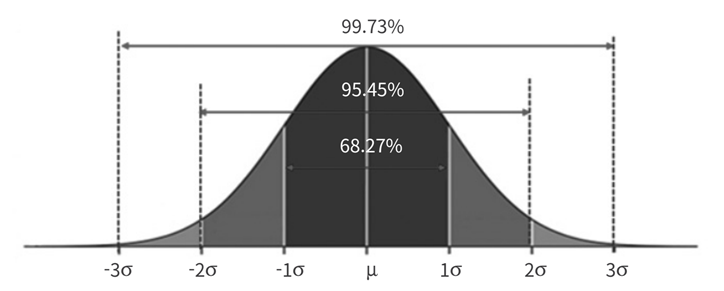
    

- GMM은 데이터를 여러 개의 가우지안 분포가 섞인 것으로 간주하고, 섞인 데이터 분포에서 개별 유형의 가우지안 분포를 추출함

### 예. 세 개의 가우지안 분포 A,B,C를 가진 데이터 세트가 있다고 가정

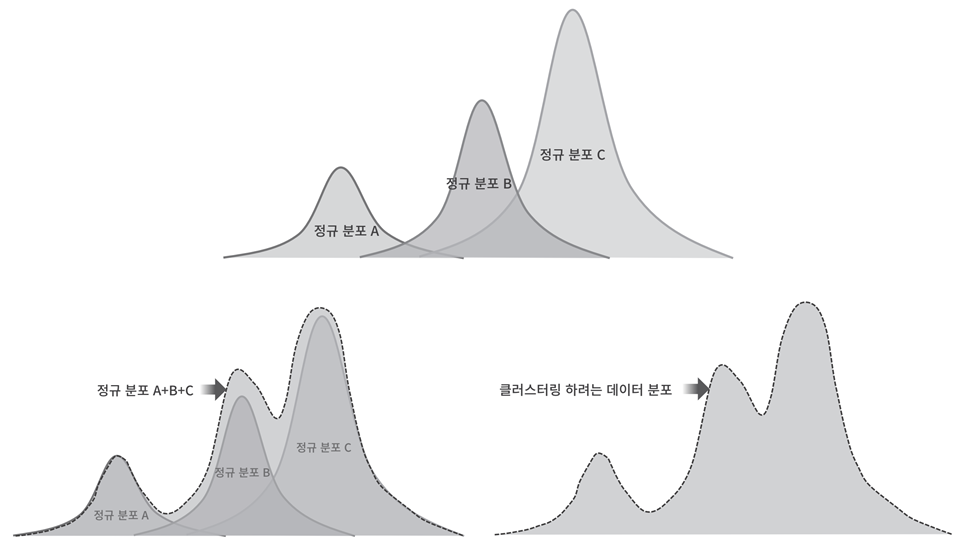

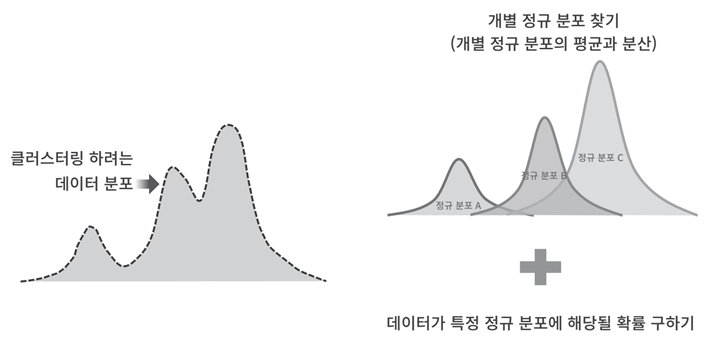

### GMM의 모수 추정

- 개별 정규분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률
    
### GMM의 모수 추정 방법
- EM(Expectation and Maximization) 방법을 적용하여 모수 추정을 함

- 사이킷런은 GMM의  EM 방식을 통한 모수 추정을 위해 **`GaussianMixture`** 클래스 지원

### GMM은 확률기반 군집화이고, K-평균은 거리기반 군집화

### GaussianMixture 클래스

- `sklearn.mixture` 패키지


- 주요 파라미터
    - `n_components` : Gaussian Mixture 모델의 총 갯수
    

- `fit(피처데이터 세트), predict(피처데이터 세트)` 메서드로 군집을 결정



## GMM 을 이용한 붓꽃 데이터 셋 클러스터링

### 붓꽃 데이터 로드

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

X = iris.data
y = iris.target

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y

In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 붓꽃 데이터의 GMM 군집화
- n_components는 3으로 지정
- 군집화 결과는 irisDF의 'gmm_cluster' 필드로 추가 저장
- GMM 군집 결과와 target 값과 비교

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)

gmm.fit(X)
cluster_labels = gmm.predict(X)
print('cluster labels :', np.unique(cluster_labels, return_counts=True))

cluster labels : (array([0, 1, 2]), array([50, 55, 45]))


- target 1만 cluster 2로 45개(90%), 1로 5개(10%) 매핑
- target 0는 cluster 0으로, target 2는 cluster 1로 모두 매핑

In [12]:
iris_df['gmm_cluster'] = cluster_labels
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [21]:
iris_df.groupby(['target'])['gmm_cluster'].value_counts()

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

### K-평균 군집화 수행

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
Kmeans_cluster = kmeans.fit_predict(X)

iris_df['Kmeans_cluster'] = Kmeans_cluster
iris_df


,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster,Kmeans_cluster
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,2
146,6.3,2.5,5.0,1.9,2,1,0
147,6.5,3.0,5.2,2.0,2,1,2
148,6.2,3.4,5.4,2.3,2,1,2


In [35]:
iris_df.groupby(['target'])['Kmeans_cluster'].value_counts()

target  Kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: Kmeans_cluster, dtype: int64

## GMM와 K-평균의 비교

- K-평균은 원형의 범위에서 군집화를 수행함
- 데이터 세트가 원형의 범위를 가질수록 KMeans 군집화 효율이 더욱 높아짐

### 예. make_blobs()로  cluster_std=0.5인 군집 3개를 생성

In [37]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 
### 인자로 받아 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**길게 늘어난 타원형의 데이터 셋을 생성**

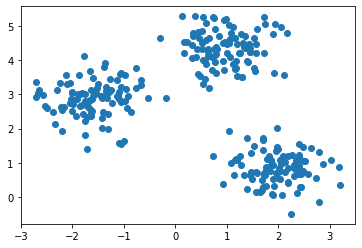

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)
plt.scatter(X[:,0], X[:,1]); plt.show()

In [54]:
# 길게 늘어난 타원형 데이터셋 생성을 위한 변환
trans = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_ansio = np.dot(X, trans)

cluster_df = pd.DataFrame(X_ansio, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.671828,3.814284,0
1,0.945385,-0.901944,1
2,-0.959199,2.857152,0
3,-2.187799,3.569903,2
4,-1.967100,3.067528,2


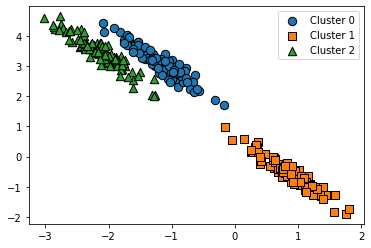

In [53]:
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)


### KMeans를 적용하여 타원형 데이터셋에 대한 군집화 결과

In [63]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_kmeans = kmeans.fit_predict(X_ansio)
cluster_df['kmeans_cluster'] = cluster_kmeans

cluster_df.groupby(['target'])['kmeans_cluster'].value_counts()

target  kmeans_cluster
0       2                  73
        0                  27
1       1                 100
2       0                  86
        2                  14
Name: kmeans_cluster, dtype: int64

### GMM을 적용한 군집화

In [69]:
gmm = GaussianMixture(random_state=0, n_components=3)
cluster_gmm = gmm.fit_predict(X_ansio)
cluster_df['gmm_cluster'] = cluster_gmm

cluster_df.groupby(['target'])['gmm_cluster'].value_counts()

target  gmm_cluster
0       2              100
1       1              100
2       0              100
Name: gmm_cluster, dtype: int64

### K-평균과 GMM 군집화 결과 비교

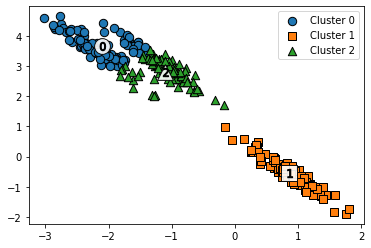

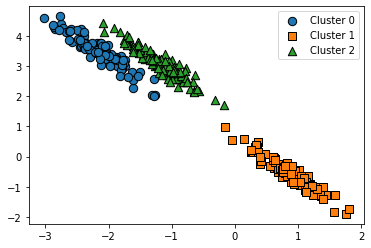

In [72]:
visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)
visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

- 긴 타원형 데이터셋에는 K-평균보다 GMM이 군집화 정확도가 더 높다
- GMM은 K-평균보다 더 다양한 데이터 세트에 잘 적용될 수 있는 장점이 있으나,
- 군집화를 위한 수행시간이 오래걸리는 단점이 있음